In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [49]:
# Load the data from the CSV file
data = pd.read_csv(r'D:\Kaggle\data\train.csv')

# Sort the data based on the DataFrame index
data = data.sort_index()

# Determine the split index
split_index = int(len(data) * 0.78)

# Create train and test sets based on the split index
trainDF = data.iloc[:split_index]
testDF = data.iloc[split_index:]

# Drop the 'user' column from the test set if it exists
if 'user' in testDF.columns:
    testDF = testDF.drop(columns=['user'])

# Verify the shapes of the resulting DataFrames
print(trainDF.shape, testDF.shape)


(693, 27) (196, 26)


In [50]:
trainDF.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,2,0,88,233,352,328,448,496,616,568,...,1184,1304,1305,1450,1400,1536,1489,1610,1705,1800
1,2,0,96,192,336,288,432,432,520,472,...,1160,1280,1256,1404,1383,1497,1424,1544,1664,1760
2,2,0,95,215,335,288,484,435,527,491,...,1047,1191,1167,1280,1255,1427,1303,1465,1548,1615
3,2,0,96,198,336,304,425,425,544,520,...,1113,1267,1268,1330,1352,1472,1353,1568,1664,1753
4,2,0,71,183,327,279,399,375,515,447,...,1111,1255,1231,1375,1351,1535,1463,1583,1703,1751


In [51]:
testDF.head()


,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
693,0,63,197,271,326,392,543,658,663,726,...,1491,1566,1655,1757,1831,1958,1959,2064,2144,2229
694,0,72,211,299,336,408,525,625,633,740,...,1458,1592,1616,1728,1768,1922,1922,2022,2166,2242
695,0,68,218,316,354,411,520,613,634,666,...,1817,1900,1932,2032,2100,2210,2270,2306,2470,2539
696,0,91,26,138,455,506,606,682,802,931,...,1500,1594,1670,1770,1827,1921,2010,2170,2146,2250
697,0,149,88,176,617,746,840,954,1040,1193,...,1665,1787,1787,1949,1927,2025,2146,2272,2250,2317


In [52]:
print('No. of rows in training dataset:',len(trainDF))
print('No. of users for which training data is present:',trainDF.user.nunique( ))

No. of rows in training dataset: 693
No. of users for which training data is present: 87


In [53]:
print('No. of rows in test dataset:',len(testDF))

No. of rows in test dataset: 196


In [54]:
trainDF1 = trainDF
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
    
testDF1 = testDF
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3388370558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3388370558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3388370558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [55]:
trainDF1.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
0,2,0,88,233,352,328,448,496,616,568,...,120,120,70,95,72,120,145,136,121,95
1,2,0,96,192,336,288,432,432,520,472,...,88,97,120,96,120,120,148,114,120,96
2,2,0,95,215,335,288,484,435,527,491,...,92,76,79,72,72,144,113,172,162,67
3,2,0,96,198,336,304,425,425,544,520,...,119,96,96,72,112,154,62,120,215,89
4,2,0,71,183,327,279,399,375,515,447,...,140,120,96,71,72,144,144,184,120,48


In [89]:
trainDF1.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

In [56]:
# Check stats of first 5 users i.e. 5 x 8 typing patterns
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]

In [57]:
temp1 = pd.DataFrame({'Min':trainDF2.min(),'Max':trainDF2.max()})
temp1.head()


,Min,Max
user,2,6
press-0,0,0
release-0,0,119
press-1,0,277
release-1,78,383


Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

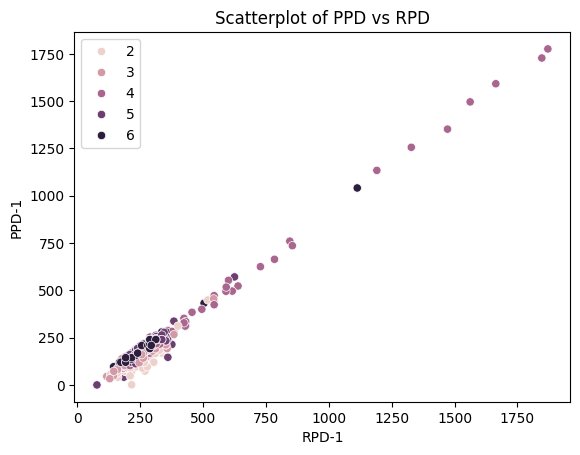

In [58]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)

# Small trick to avoid repeating legends: https://stackoverflow.com/a/36268401/5370202    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')

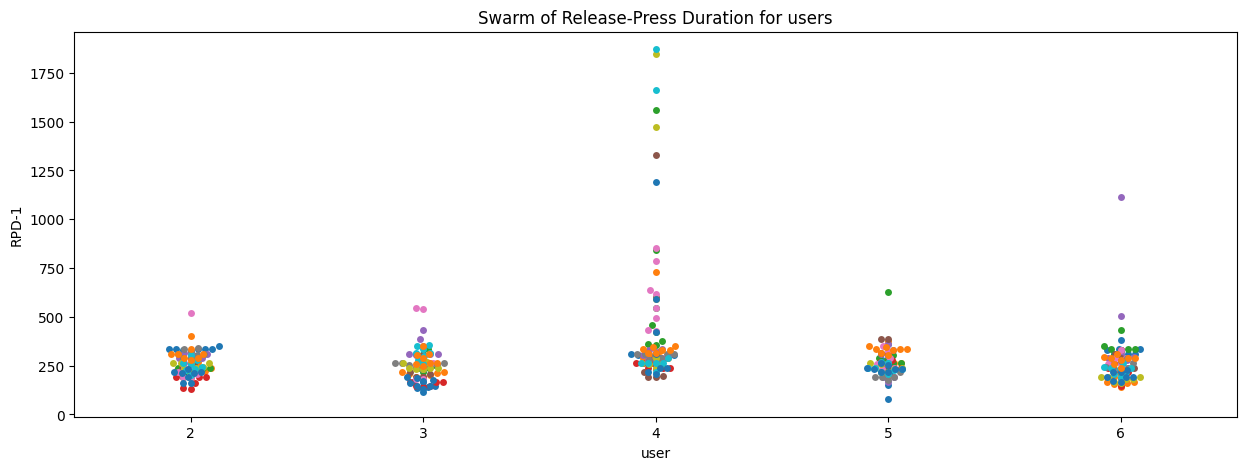

In [59]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

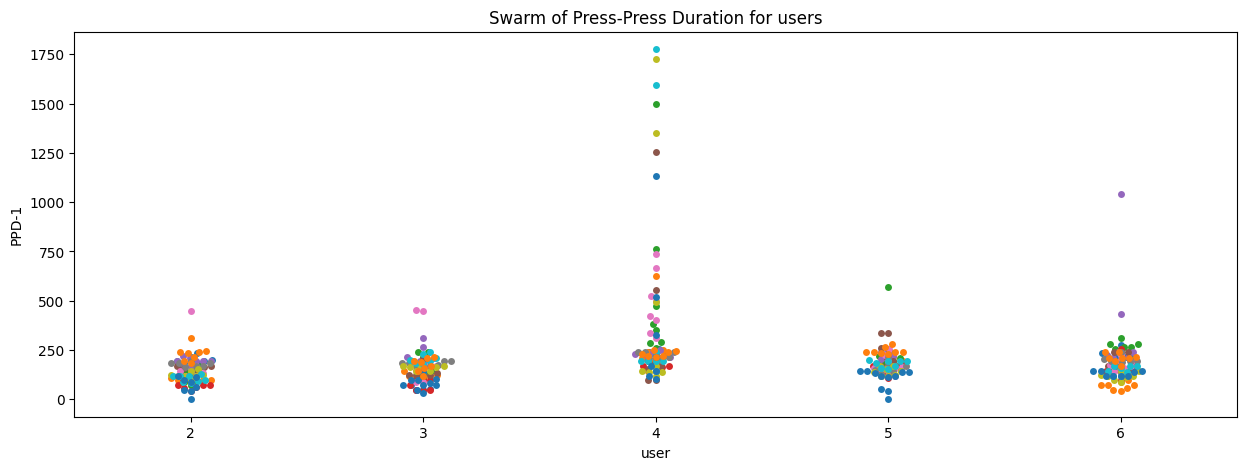

In [60]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Press-Press Duration for users')

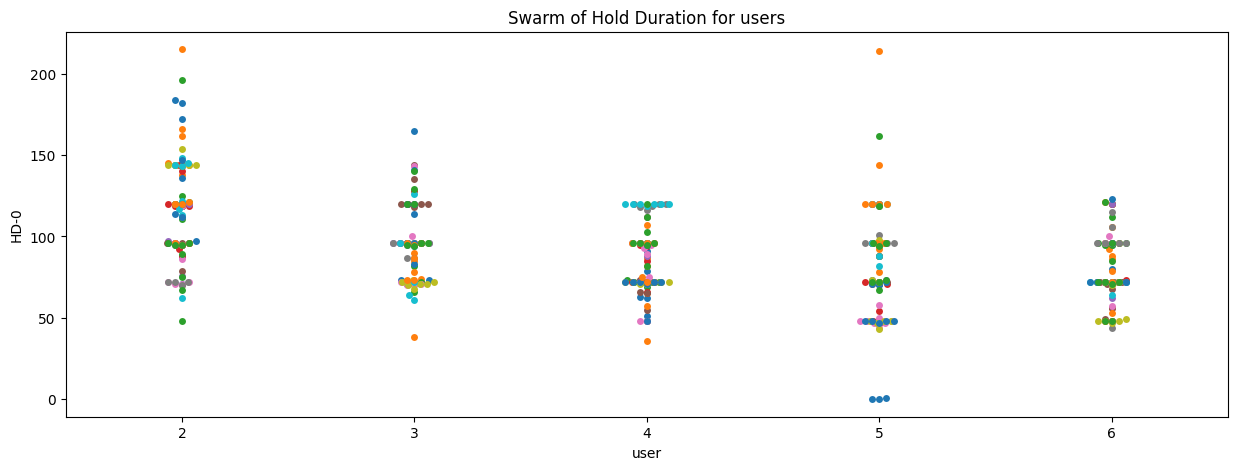

In [61]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Hold Duration for users')

In [62]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

user  press-  HD-
id key_no                   
0  0          2       0   88
   1          2     233  119
   2          2     328  120
   3          2     496  120
   4          2     568  120
...         ...     ...  ...
39 8          6    1519   48
   9          6    1640   72
   10         6    1783   72
   11         6    1927   48
   12         6    2136   85

[520 rows x 3 columns]

<Axes: xlabel='press-', ylabel='HD-'>

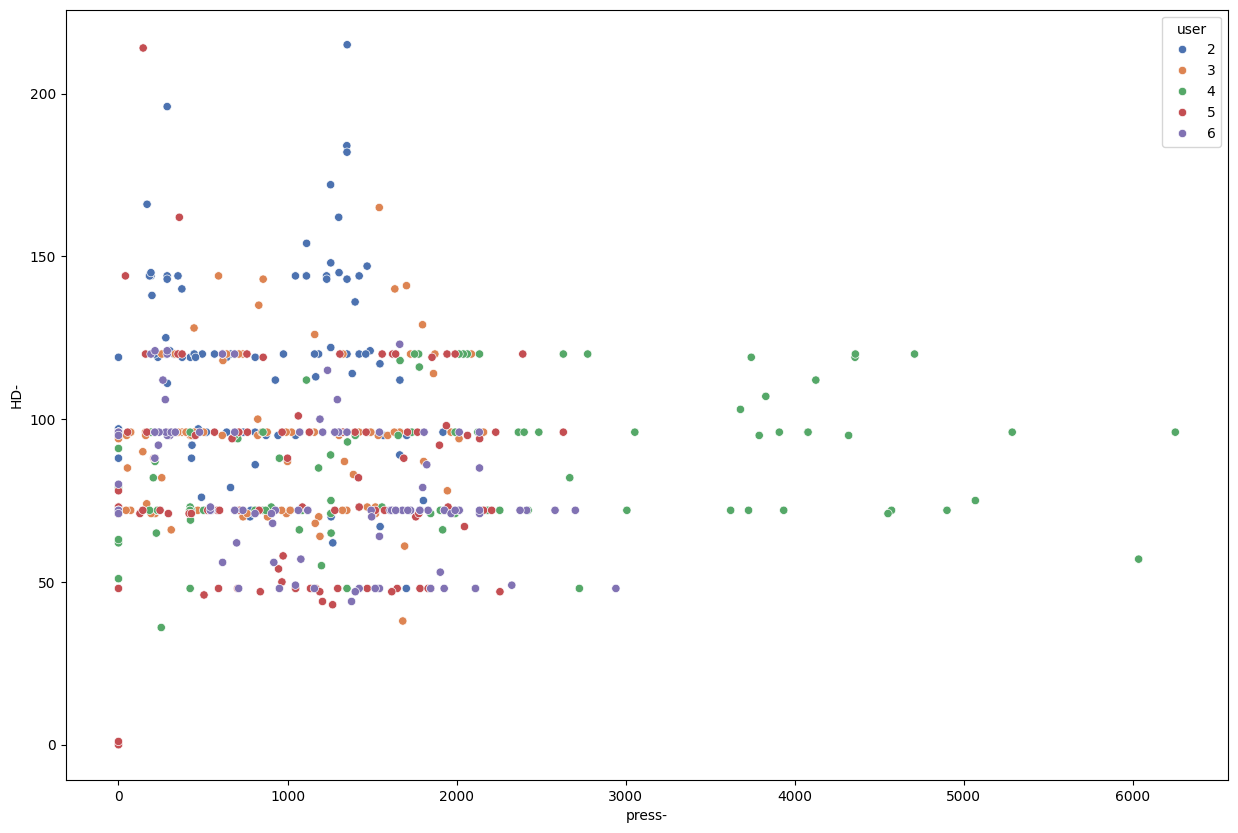

In [63]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

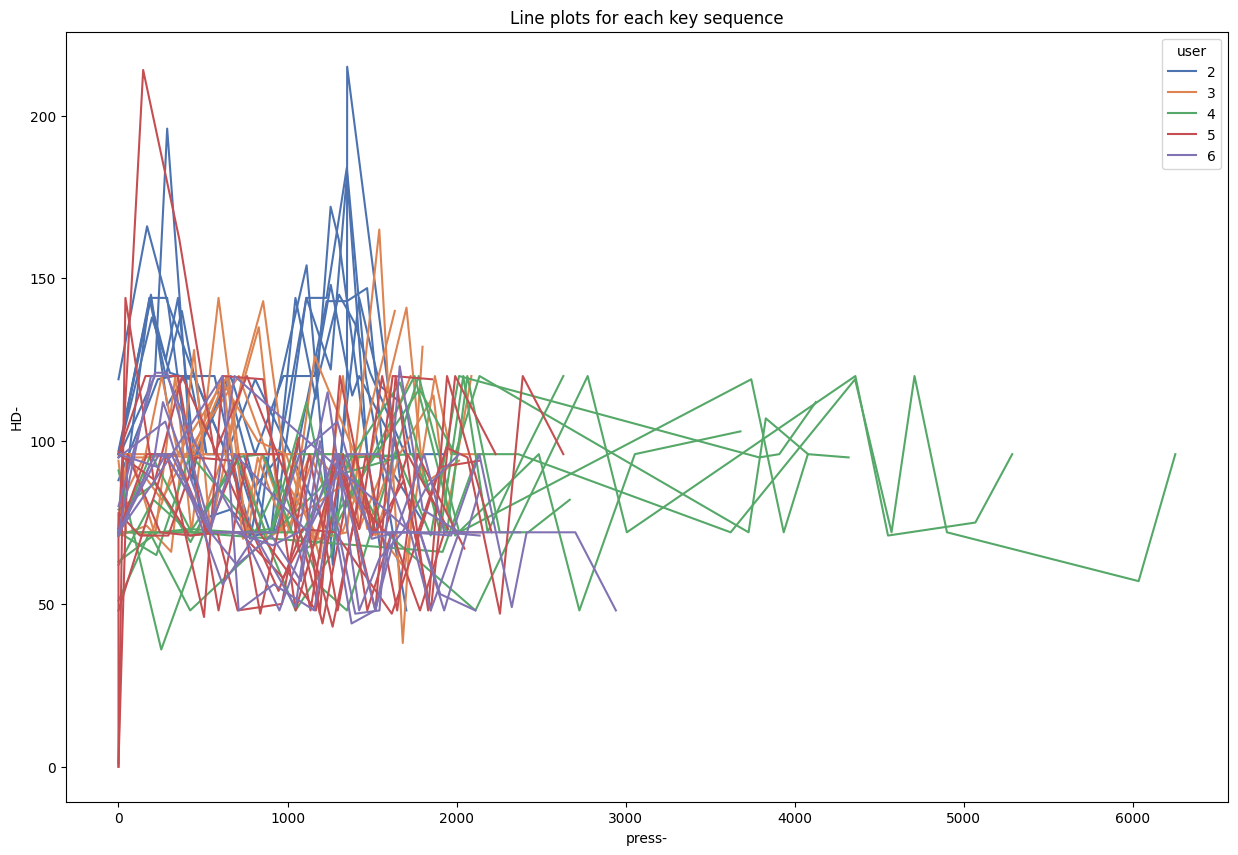

In [64]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [65]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF2.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_PPD_analysis

<Axes: xlabel='press-', ylabel='PPD-'>

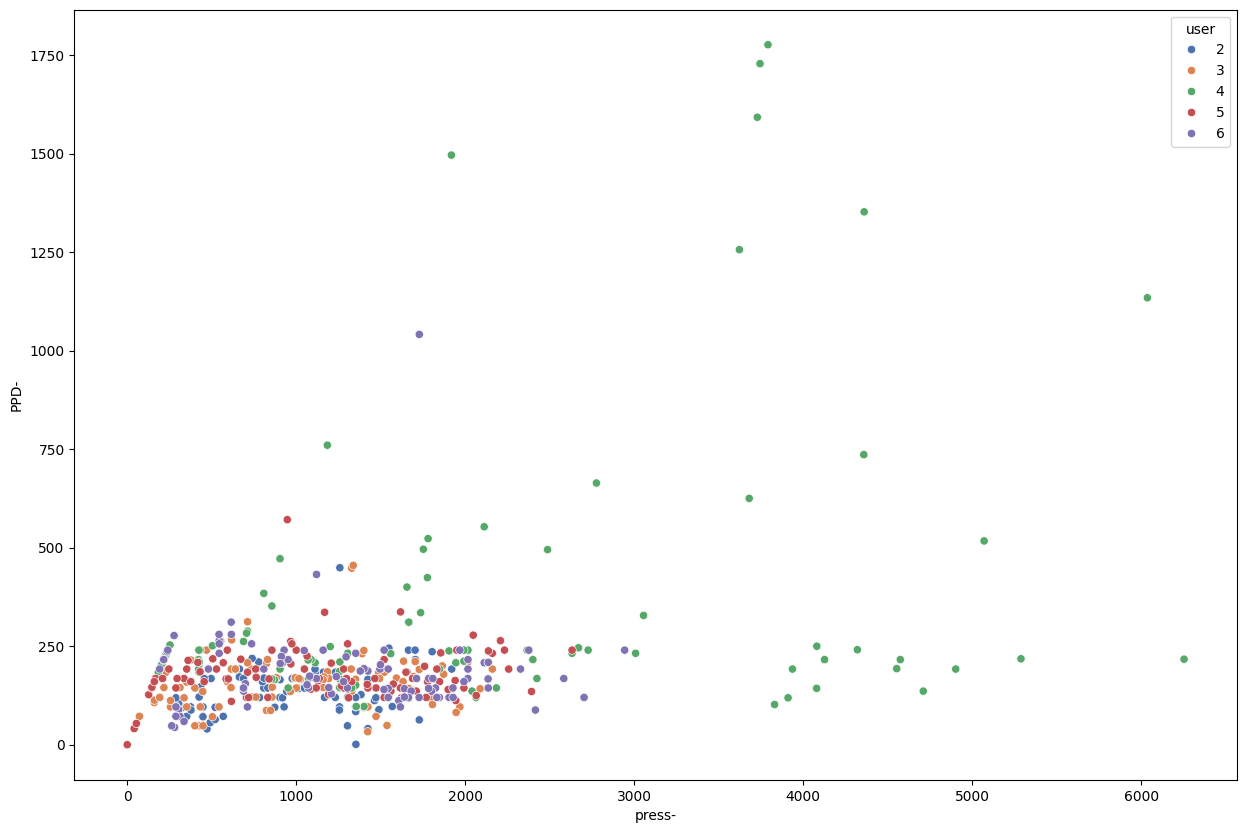

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

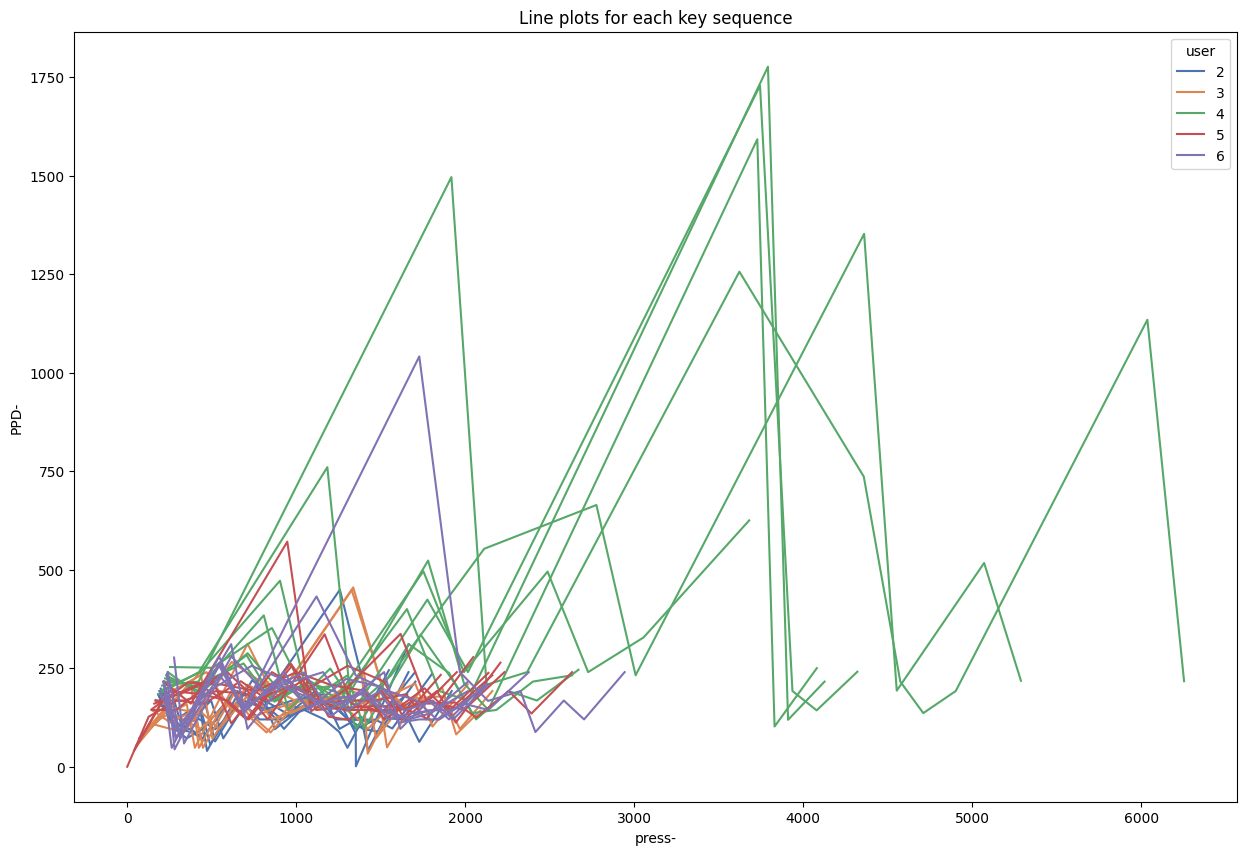

In [67]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [68]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF2.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_RPD_analysis

<Axes: xlabel='press-', ylabel='RPD-'>

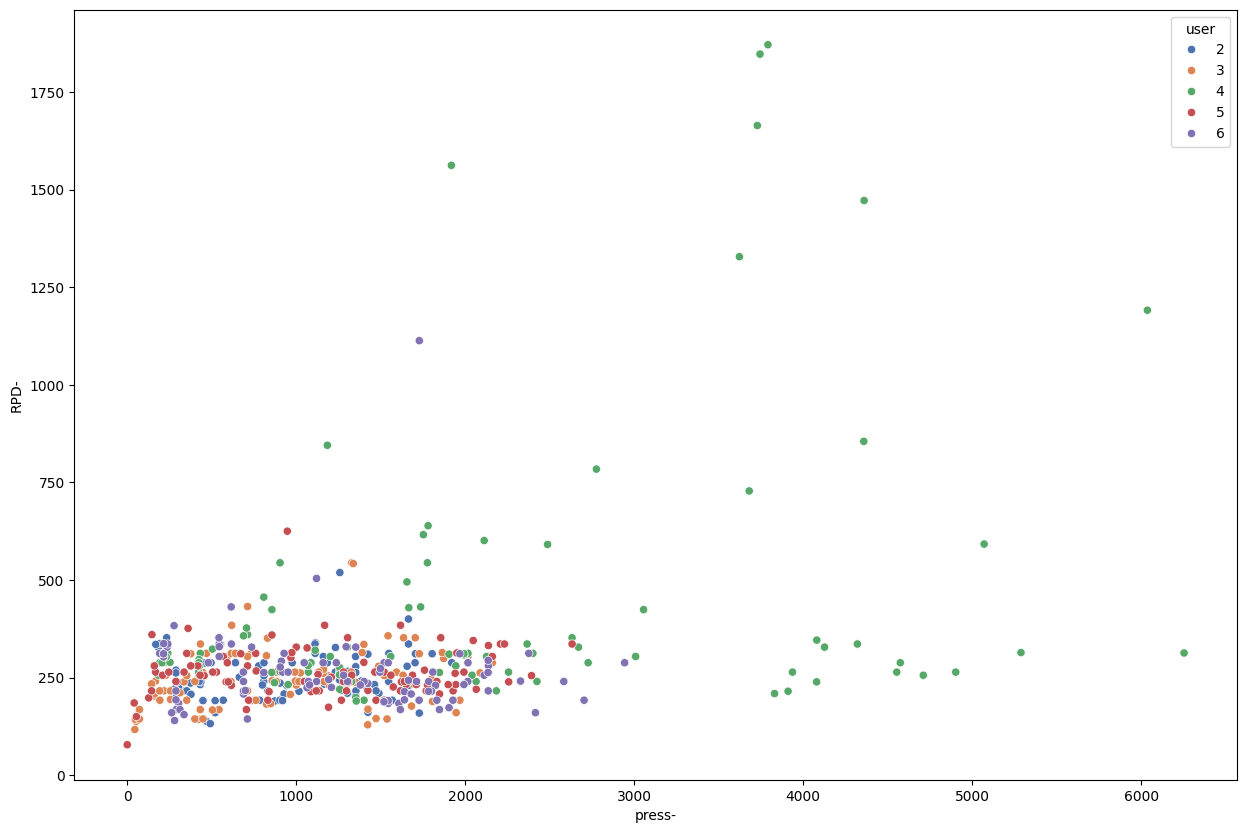

In [69]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

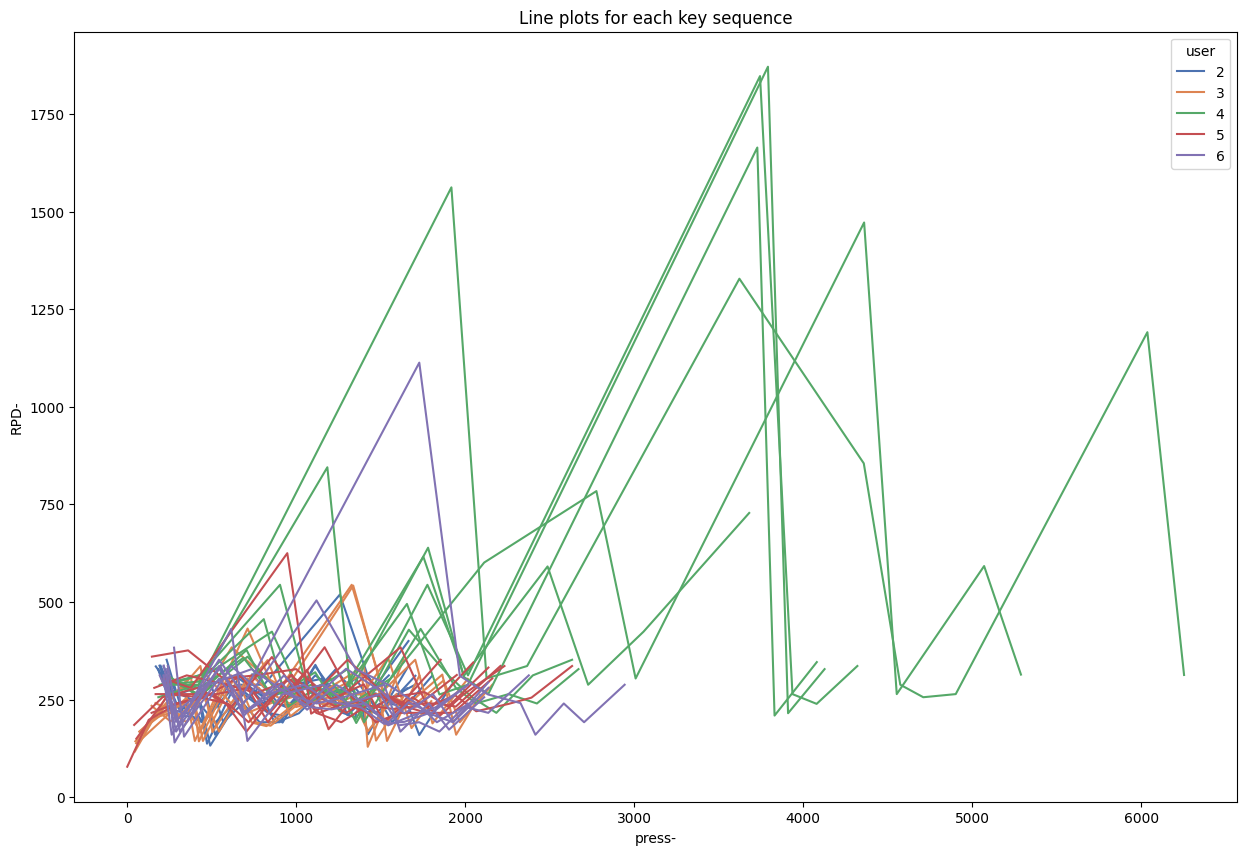

In [70]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [71]:
## Training Data
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF1.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF1.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF1.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_PPD_analysis = testDF1.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

In [72]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined

user  press-  HD-   RPD-   PPD-
id  key_no                                 
0   0          2       0   88    NaN    NaN
    1          2     233  119  352.0  233.0
    2          2     328  120  215.0   95.0
    3          2     496  120  288.0  168.0
    4          2     568  120  192.0   72.0
...          ...     ...  ...    ...    ...
692 8         88    1914  125  222.0   97.0
    9         88    2128   55  269.0  214.0
    10        88    2243  124  239.0  115.0
    11        88    2367  104  228.0  124.0
    12        88    2647   73  353.0  280.0

[9009 rows x 5 columns]

C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3043367649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3043367649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['

Text(0.5, 1.0, 'Hist of Release-Press Duration')

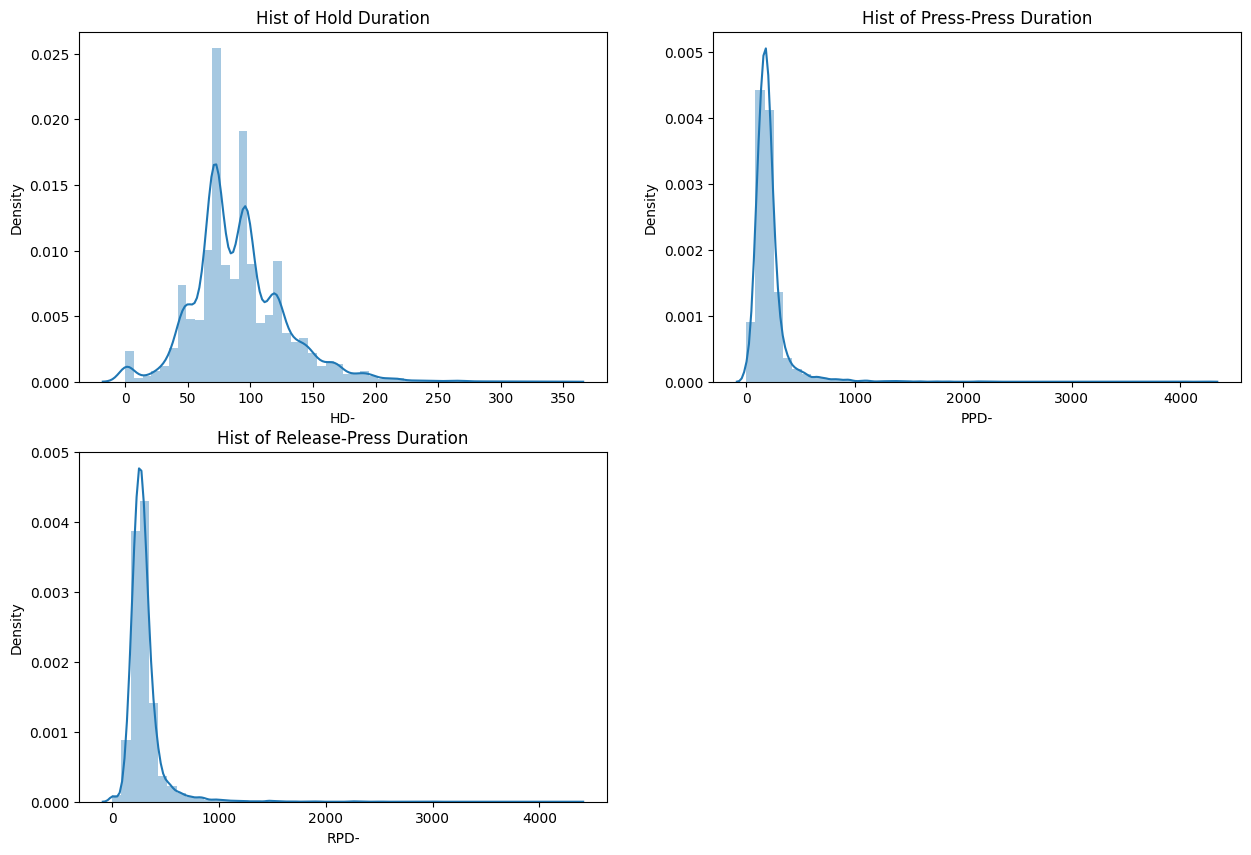

In [73]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.displot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
plt.subplot(2,2,2)
sns.displot(trainDFCombined['PPD-']).set_title('Hist of Press-Press Duration')
plt.subplot(2,2,3)
sns.displot(trainDFCombined['RPD-']).set_title('Hist of Release-Press Duration')

In [74]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPDMax = trainDFCombined['RPD-'].max()
PPDMax = trainDFCombined['PPD-'].max()
print('Max values in train are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)


## Test Data
HDMax = testDFCombined['HD-'].max()
RPDMax = testDFCombined['RPD-'].max()
PPDMax = testDFCombined['PPD-'].max()
print('Max values in test data are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 348 RPDMax: 4322.0 PPDMax: 4255.0
Max values in test data are: HDMax: 248 RPDMax: 1820.0 PPDMax: 1742.0


In [75]:
trainDFCombined

user  press-  HD-   RPD-   PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                        
0   0          2       0   88    NaN    NaN      5    -1.0    -1.0
    1          2     233  119  352.0  233.0      7     7.0     7.0
    2          2     328  120  215.0   95.0      8     0.0     2.0
    3          2     496  120  288.0  168.0      8     4.0     5.0
    4          2     568  120  192.0   72.0      8     0.0     1.0
...          ...     ...  ...    ...    ...    ...     ...     ...
692 8         88    1914  125  222.0   97.0      8     1.0     2.0
    9         88    2128   55  269.0  214.0      1     6.0     4.0
    10        88    2243  124  239.0  115.0      8     1.0     3.0
    11        88    2367  104  228.0  124.0      7     2.0     2.0
    12        88    2647   73  353.0  280.0      3     8.0     8.0

[9009 rows x 8 columns]

In [76]:
testDFCombined

press-  HD-   RPD-   PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                         
693 0                   0   63    NaN    NaN    1.0    -1.0    -1.0
    1                 197   74  271.0  197.0    3.0     5.0     4.0
    2                 326   66  195.0  129.0    1.0     2.0     1.0
    3                 543  115  332.0  217.0    7.0     6.0     7.0
    4                 663   63  183.0  120.0    1.0     1.0     1.0
...                   ...  ...    ...    ...    ...     ...     ...
888 8       1717580914280  119  264.0  145.0    7.0     3.0     4.0
    9       1717580914408   99  227.0  128.0    6.0     2.0     2.0
    10      1717580914529  104  225.0  121.0    7.0     1.0     2.0
    11      1717580914672  142  285.0  143.0    9.0     2.0     5.0
    12      1717580914824  154  306.0  152.0    9.0     3.0     6.0

[2548 rows x 7 columns]

In [77]:
## Lower limit values of bins created
HDBins, RPDBins, PPDBins, 'No. of buckets: '+str(len(HDBins)-1)

(array([  0.,  48.,  66.,  72.,  74.,  87.,  96., 100., 119., 136., 348.]),
 array([   0.,   95.,  121.,  144.,  166.,  184.,  200.,  219.,  254.,
         316., 4255.]),
 array([   0.,  182.,  211.,  234.,  256.,  271.,  292.,  316.,  352.,
         422., 4322.]),
 'No. of buckets: 10')

C:\Users\hp\AppData\Local\Temp\ipykernel_17028\475938781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\475938781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='PPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-pre

Text(0.5, 1.0, 'Swarm plot of binned release-press duration')

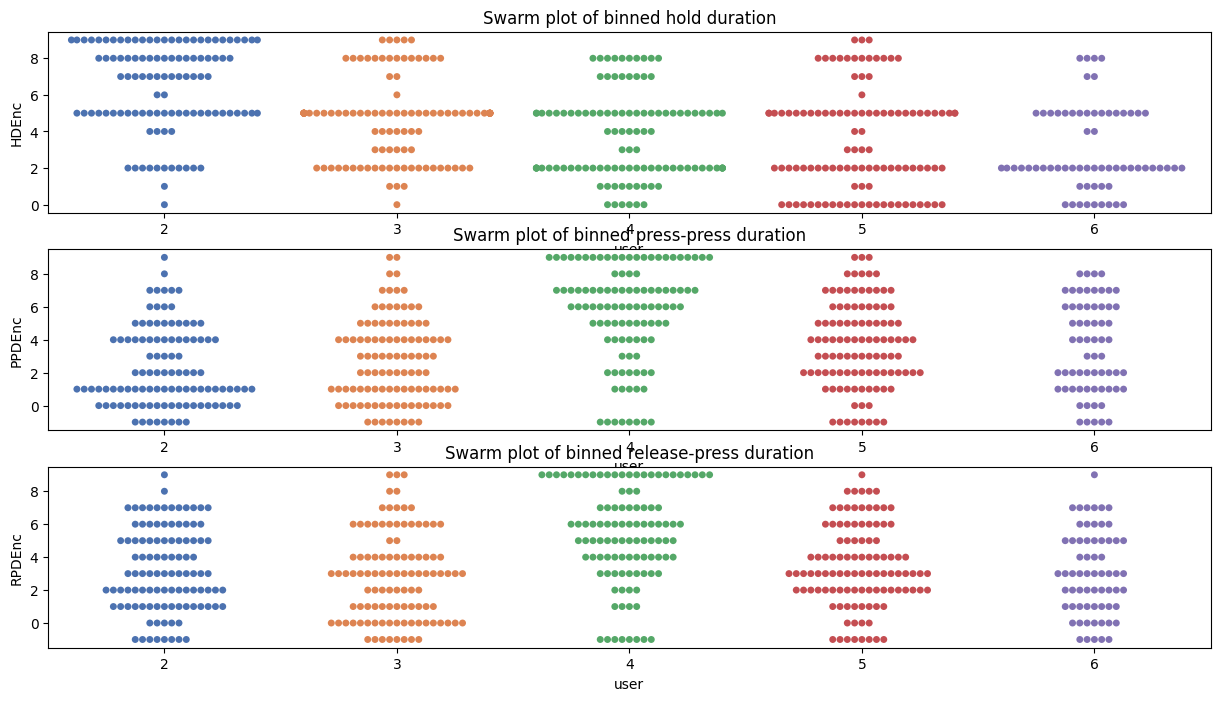

In [78]:
plt.figure(figsize=(15,8))
noOfUsers = 5
plt.subplot(3,1,1)
sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
plt.subplot(3,1,2)
sns.swarmplot(y='PPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-press duration')
plt.subplot(3,1,3)
sns.swarmplot(y='RPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-press duration')

In [79]:
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
trainDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
2,5.000,8.625,8.250,7.125,6.125,5.125,3.625,4.125,8.750,7.375,...,3.000,0.625,5.000,2.500,3.000,6.125,3.250,3.375,1.125,6.000
3,3.375,3.875,3.250,5.750,4.250,7.625,4.125,4.750,2.500,4.000,...,4.250,0.500,6.750,2.750,4.000,3.375,3.125,6.000,0.250,4.750
4,2.250,2.500,2.250,2.875,3.750,3.125,2.875,6.875,2.375,7.500,...,8.625,3.625,6.000,3.875,9.000,5.500,5.625,5.125,5.250,7.000
5,1.875,5.875,5.500,1.750,4.750,3.500,0.250,4.500,1.375,5.625,...,4.875,3.500,4.125,4.750,4.125,1.875,2.875,2.625,2.500,6.750
6,3.000,6.000,6.000,3.125,2.750,1.500,2.875,4.875,0.875,1.625,...,6.875,2.875,5.875,3.875,3.875,3.375,0.875,2.375,1.125,4.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.250,1.125,0.375,0.000,1.250,0.375,1.750,0.625,0.250,2.500,...,1.625,0.000,0.875,1.250,0.250,0.000,0.125,0.125,0.250,1.875
85,1.375,4.125,3.625,7.375,4.500,5.625,8.125,5.375,7.250,7.625,...,7.250,1.125,7.375,6.375,3.500,3.625,4.375,5.500,3.000,5.375
86,1.000,0.625,1.000,4.625,0.750,3.875,2.000,5.250,3.250,4.000,...,6.500,0.000,3.375,1.250,2.875,1.625,1.375,1.750,1.750,5.250


In [80]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
testDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
693,1.0,3.0,1.0,7.0,1.0,2.0,1.0,2.0,4.0,7.0,...,7.0,1.0,6.0,4.0,4.0,4.0,4.0,6.0,2.0,4.0
694,2.0,5.0,2.0,6.0,7.0,7.0,1.0,8.0,8.0,7.0,...,5.0,2.0,7.0,6.0,7.0,6.0,4.0,6.0,3.0,7.0
695,2.0,6.0,1.0,5.0,0.0,0.0,0.0,6.0,4.0,6.0,...,4.0,0.0,3.0,9.0,7.0,6.0,2.0,5.0,1.0,4.0
696,5.0,7.0,1.0,4.0,8.0,7.0,5.0,4.0,5.0,6.0,...,2.0,7.0,2.0,6.0,6.0,2.0,4.0,3.0,7.0,3.0
697,9.0,5.0,8.0,7.0,9.0,8.0,5.0,6.0,8.0,9.0,...,7.0,8.0,3.0,3.0,5.0,5.0,5.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,7.0,9.0,8.0,7.0,7.0,9.0,7.0,7.0,9.0,7.0,...,3.0,7.0,8.0,5.0,7.0,7.0,4.0,3.0,9.0,7.0
885,7.0,9.0,1.0,2.0,5.0,9.0,3.0,4.0,7.0,4.0,...,0.0,3.0,7.0,4.0,2.0,2.0,2.0,2.0,7.0,2.0
886,5.0,4.0,9.0,9.0,7.0,9.0,9.0,7.0,9.0,5.0,...,7.0,7.0,9.0,7.0,8.0,8.0,3.0,1.0,0.0,8.0


In [81]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

trainDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
2,5,7,8,8,8,2,5,2,8,9,...,5.0,1.0,5.0,1.0,2.0,5.0,4.0,2.0,1.0,6.0
2,5,9,9,5,6,8,5,8,8,9,...,2.0,0.0,6.0,3.0,5.0,6.0,3.0,3.0,0.0,7.0
2,5,8,9,5,4,4,2,2,9,7,...,3.0,0.0,3.0,1.0,1.0,5.0,2.0,4.0,1.0,6.0
2,5,9,8,7,5,5,2,7,9,1,...,3.0,1.0,4.0,2.0,1.0,7.0,2.0,1.0,2.0,8.0
2,2,9,8,9,8,5,2,2,9,9,...,3.0,1.0,5.0,2.0,1.0,7.0,4.0,6.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1,2,1,1,1,1,1,4,1,3,...,7.0,1.0,4.0,6.0,5.0,3.0,5.0,9.0,3.0,5.0
88,1,4,4,2,1,1,1,2,6,5,...,3.0,2.0,3.0,3.0,3.0,4.0,4.0,8.0,4.0,3.0
88,1,2,1,5,0,1,1,2,7,4,...,6.0,0.0,4.0,6.0,4.0,6.0,4.0,7.0,6.0,9.0


In [82]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

testDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
693,1.0,3.0,1.0,7.0,1.0,2.0,1.0,2.0,4.0,7.0,...,7.0,1.0,6.0,4.0,4.0,4.0,4.0,6.0,2.0,4.0
694,2.0,5.0,2.0,6.0,7.0,7.0,1.0,8.0,8.0,7.0,...,5.0,2.0,7.0,6.0,7.0,6.0,4.0,6.0,3.0,7.0
695,2.0,6.0,1.0,5.0,0.0,0.0,0.0,6.0,4.0,6.0,...,4.0,0.0,3.0,9.0,7.0,6.0,2.0,5.0,1.0,4.0
696,5.0,7.0,1.0,4.0,8.0,7.0,5.0,4.0,5.0,6.0,...,2.0,7.0,2.0,6.0,6.0,2.0,4.0,3.0,7.0,3.0
697,9.0,5.0,8.0,7.0,9.0,8.0,5.0,6.0,8.0,9.0,...,7.0,8.0,3.0,3.0,5.0,5.0,5.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,7.0,9.0,8.0,7.0,7.0,9.0,7.0,7.0,9.0,7.0,...,3.0,7.0,8.0,5.0,7.0,7.0,4.0,3.0,9.0,7.0
885,7.0,9.0,1.0,2.0,5.0,9.0,3.0,4.0,7.0,4.0,...,0.0,3.0,7.0,4.0,2.0,2.0,2.0,2.0,7.0,2.0
886,5.0,4.0,9.0,9.0,7.0,9.0,9.0,7.0,9.0,5.0,...,7.0,7.0,9.0,7.0,8.0,8.0,3.0,1.0,0.0,8.0


In [83]:
knn_summary = KNeighborsClassifier(1)
trainX_summary = trainDF_UserProps.reset_index().drop(columns=['user'])
trainY_summary = trainDF_UserProps.index

# testX_summary = testDF_UserProps.reset_index().drop(columns=['id'])

knn_summary.fit(trainX_summary,trainY_summary)

accuracy_score(knn_summary.predict(trainX_summary),trainY_summary)

1.0

Accuracies: [0.697841726618705, 0.6532374100719425, 0.6618705035971223, 0.6748201438848921, 0.6589928057553956, 0.6474820143884892, 0.637410071942446]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

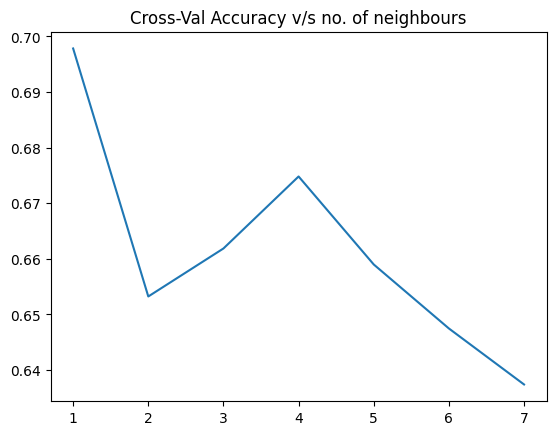

In [84]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        acc += [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
    return sum(acc) / len(acc)
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

In [85]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Use the number of unique classes after encoding
    nthread=4,
    seed=27
)

param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 210, 230, 250, 270, 290, 310, 330],
    'max_depth': range(4, 10, 1)
}

gsearch2b = GridSearchCV(
    estimator=xgb1,
    param_grid=param_search,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0),
    verbose=1
)

gsearch2b.fit(trainX_allSamples, trainY_encoded)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
CPU times: total: 7.27 s
Wall time: 12min 35s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=10,
                                     n_jobs=None, nthread=4, num_class=87, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': range(4, 10),
                         'n_estimators': [100, 200, 210, 230, 250, 270, 290,
                                          310, 330]},
             scoring='accuracy', verbose=1)

In [86]:
print('Best Estimator:\n',gsearch2b.best_estimator_)

Best Estimator:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=230, n_jobs=None, nthread=4,
              num_class=87, ...)


In [87]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []

for train_index, test_index in sss.split(trainX_allSamples, trainY_encoded):
    gsearch2b.best_estimator_.fit(trainX_allSamples.iloc[train_index], trainY_encoded[train_index])
    predictions = gsearch2b.best_estimator_.predict(trainX_allSamples.iloc[test_index])
    acc = accuracy_score(predictions, trainY_encoded[test_index])
    print('Accuracy Score:', acc)
    accs.append(acc)

print('Average Accuracy:', sum(accs) / len(accs))


Accuracy Score: 0.697841726618705
Accuracy Score: 0.7697841726618705
Accuracy Score: 0.7122302158273381
Accuracy Score: 0.7697841726618705
Accuracy Score: 0.7553956834532374
Average Accuracy: 0.7410071942446044


In [88]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Create a DataFrame with 'idx' and 'user' columns and save it to a CSV file
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 'user': textPreds_allSamples})
submission_df.to_csv('submission.csv', index=False)
